In [60]:
%matplotlib inline
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import matplotlib.pylab as plt
import csv
import time

In [42]:
endpoint = 10000; # integration range
dx = 100.0; # step size
dx100 = 100000.0; # step size
lam0 = 0.845258; # in unit of omegam, omegam = 3.66619*10^-17
dellam = np.array([0.00003588645221954444, 0.06486364865874367]); # deltalambda/omegam
ks = [1.0,1.0/90]; # two k's
thm = 0.16212913985547778; # theta_m

psi0, x0 = [1.0, 0.0, 0.0, 0.0], 0 # initial condition
savestep = 1000; # save to file every savestep steps

In [43]:
def hamiltonian(x, deltalambda, k, thetam):
    
    return [[ 0,   0.5* np.sin(2*thetam) * ( deltalambda[0] * np.sin(k[0]*x) + deltalambda[1] * np.sin(k[1]*x) ) * np.exp( 1.0j * ( - x - np.cos(2*thetam) * (  ( deltalambda[0]/k[0] * np.cos(k[0]*x) + deltalambda[1]/k[1] * np.cos(k[1]*x) ) )  ) )     ],   [ 0.5* np.sin(2*thetam) * ( deltalambda[0] * np.sin(k[0]*x) + deltalambda[1] * np.sin(k[1]*x) ) * np.exp( -1.0j * ( - x - np.cos(2*thetam) * ( deltalambda[0] /k[0] * np.cos(k[0]*x) + deltalambda[1] /k[1] * np.cos(k[1]*x) )  ) ), 0 ]]   # Hamiltonian for double frequency

def hamiltonian4(x, deltalambda, k, thetam):
    hr = np.array(hamiltonian(x, deltalambda, k, thetam)).real;
    hi = np.array(hamiltonian(x, deltalambda, k, thetam)).imag;
    
    # Ordering of 
    
    return [[hi[0][0],hi[0][1],hr[0][0],hr[0][1]], [hi[1][0],hi[1][1],hr[1][0],hr[1][1]], [- hr[0][0], - hr[0][1], hi[0][0], hi[0][1]],  [- hr[1][0], - hr[1][1], hi[1][0], hi[1][1]] ]

def sysdpsidt(psi, x, deltalambda, k, thetam):
    
    return np.dot(hamiltonian4(x, deltalambda, k, thetam), [psi[0], psi[1], psi[2], psi[3]])

def sysjac(psi, x, deltalambda, k, thetam):
    
    return hamiltonian4(x, deltalambda, k, thetam)

In [58]:
def integral_tol(total_error_needed,totalrange, stepsize): # tolenrance of the integral that we require
    
    return total_error_needed*stepsize/totalrange

In [59]:
# Test the function
#hamiltonian4(10,dellam,ks,thm)
#hamiltonian(10,dellam,ks,thm)
integral_tol(1e-4,endpoint,dx)

1e-06

In [45]:
xlin = np.linspace(0, endpoint, np.floor(endpoint/dx) )
# xlin100 = np.linspace(0, endpoint, np.floor(endpoint/dx100) )
#print xlin

In [46]:
solodeint = odeint(sysdpsidt, psi0, xlin, args = (dellam,ks,thm), full_output = 1)

In [47]:
# solodeint100 = odeint(sysdpsidt, psi0, xlin100, args = (dellam,ks,thm), full_output = 1)

In [48]:
solodeint[1]['message']

'Integration successful.'

In [49]:
prob0=solodeint[0][:,0]**2+solodeint[0][:,2]**2
prob1=solodeint[0][:,1]**2+solodeint[0][:,3]**2

#prob0_100=solodeint100[0][:,0]**2+solodeint100[0][:,2]**2
#prob1_100=solodeint100[0][:,1]**2+solodeint100[0][:,3]**2

In [50]:
#print prob0, prob1, prob0+prob1

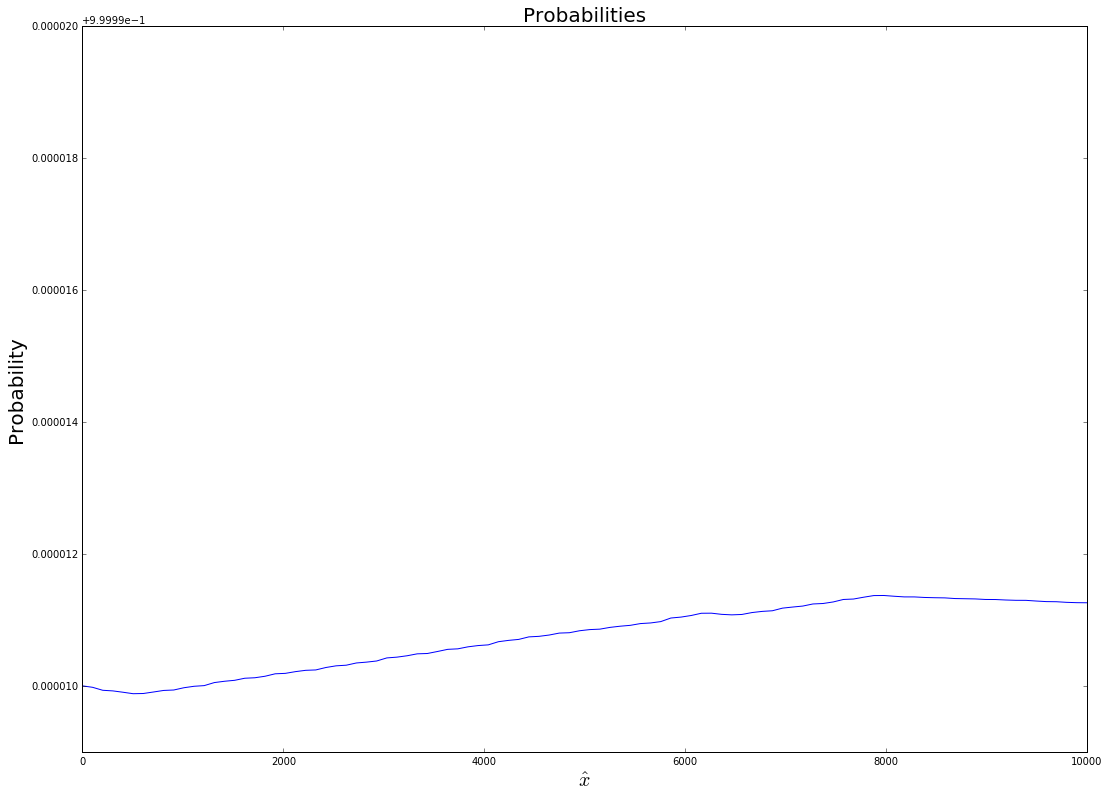

In [51]:
# plt.figure(figsize=(18,13))

# plt.plot(xlin, prob0,'-')
# plt.title("Probabilities",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()

# plt.figure(figsize=(18,13))

# plt.plot(xlin, prob1,'-')
# plt.title("Probabilities",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()

plt.figure(figsize=(18,13))

plt.plot(xlin, prob0+prob1, '-')
# plt.plot(xlin, prob0+prob1, '-', xlin100, prob0_100 + prob1_100,'*')
# plt.plot(xlin100, prob0_100 + prob1_100,'*')
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.ylim([0.999999,1.00001])
plt.show()



In [3]:
import scipy
scipy.__version__

'0.17.1'

### Data Processing Unit

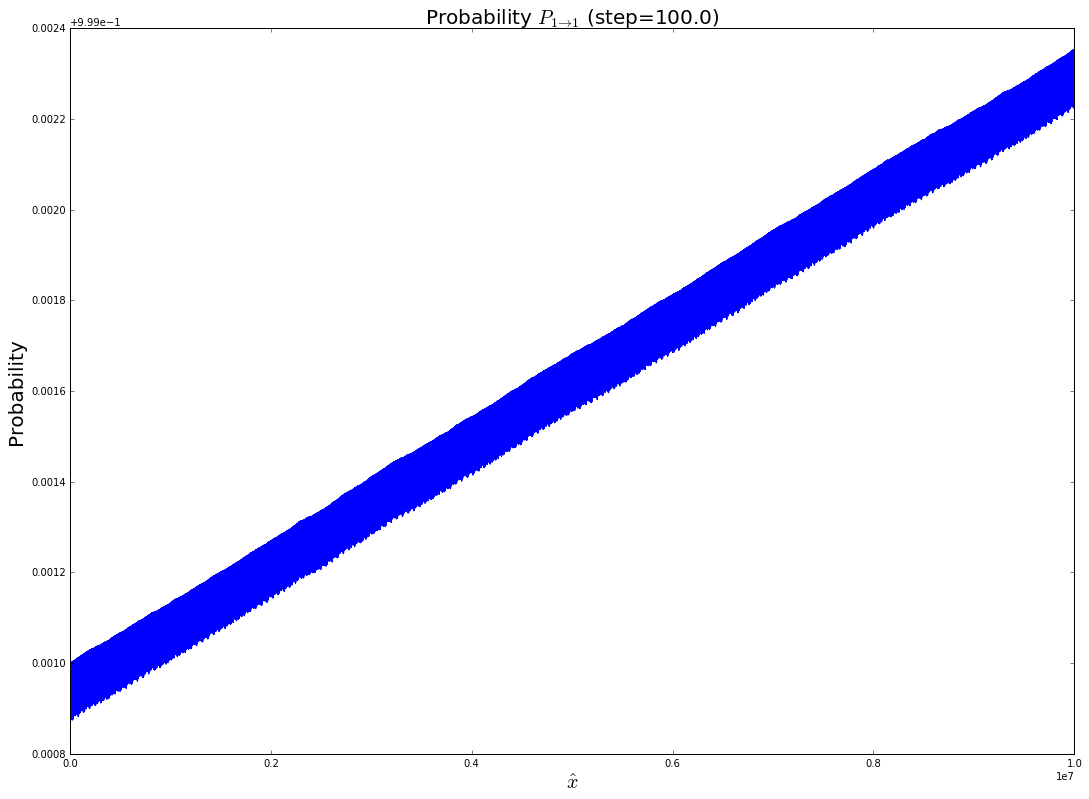

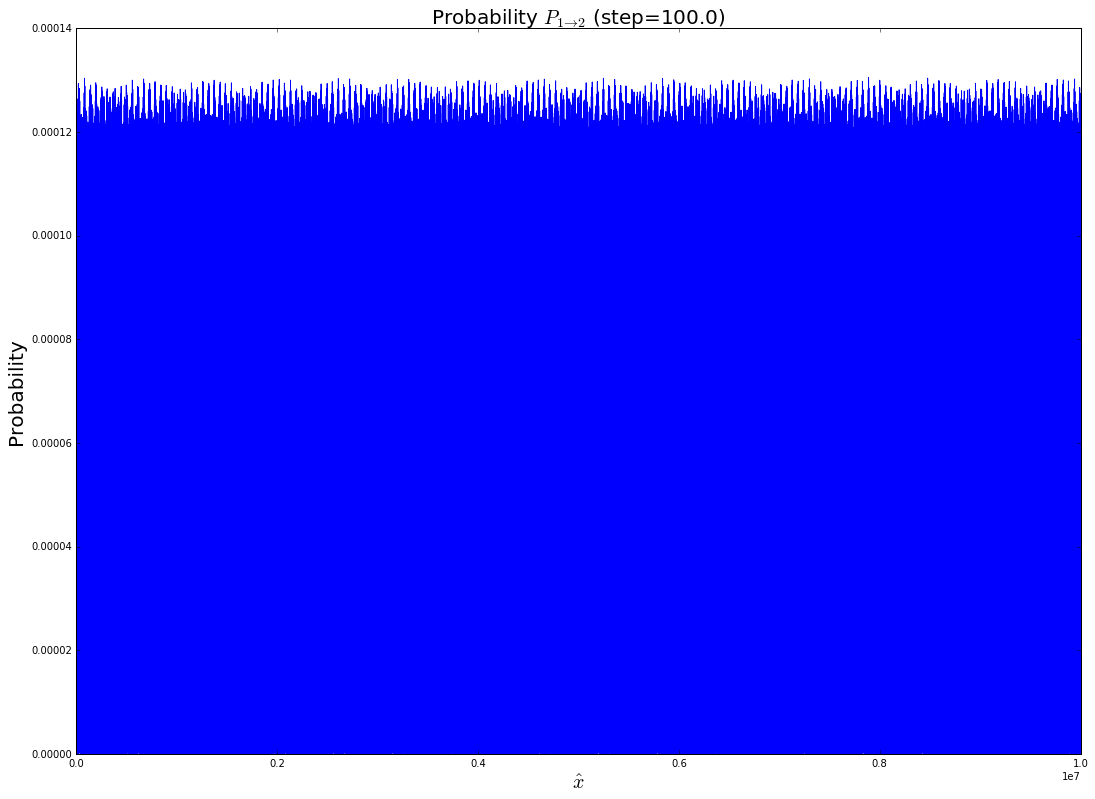

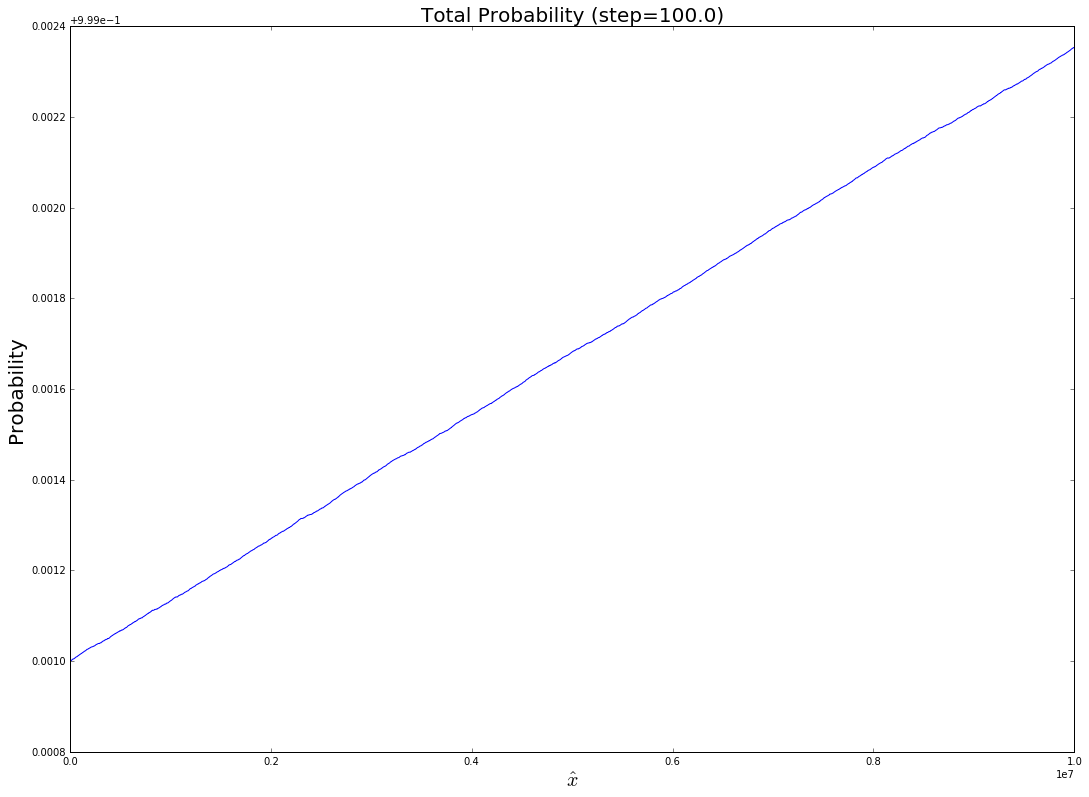

In [62]:
xlin_supernova = np.load("assets/two-freq-real-ize-xlin-10000000-100.0.npy")
prob0_supernova = np.load("assets/two-freq-real-ize-prob0-10000000-100.0.npy")
prob1_supernova = np.load("assets/two-freq-real-ize-prob1-10000000-100.0.npy")

plt.figure(figsize=(18,13))

plt.plot(xlin_supernova, prob0_supernova,'-')
plt.title("Probability $P_{1\\to1}$ (step=100.0)",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()


plt.figure(figsize=(18,13))

plt.plot(xlin_supernova, prob1_supernova,'-')
plt.title("Probability $P_{1\\to2}$ (step=100.0)",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()

plt.figure(figsize=(18,13))

plt.plot(xlin_supernova, prob1_supernova+prob0_supernova,'-')
plt.title("Total Probability (step=100.0)",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()


Examples of odeint

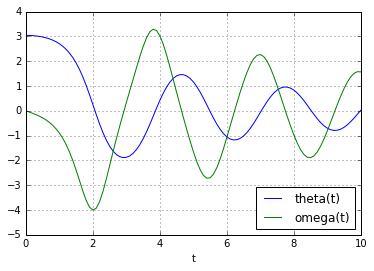

In [33]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

t = np.linspace(0, 10, 101)

sol = odeint(pend, y0, t, args=(b, c),full_output=1)


plt.plot(t, sol[0][:, 0], 'b', label='theta(t)')
plt.plot(t, sol[0][:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [36]:
sol[1]

{'hu': array([ 0.02909913,  0.02909913,  0.02909913,  0.02461187,  0.04466197,
         0.04466197,  0.04975119,  0.04975119,  0.0394766 ,  0.0394766 ,
         0.0324055 ,  0.0324055 ,  0.0324055 ,  0.03697811,  0.03697811,
         0.03064065,  0.03064065,  0.03064065,  0.02819459,  0.02819459,
         0.02819459,  0.02819459,  0.02819459,  0.02819459,  0.03341736,
         0.03341736,  0.03341736,  0.03341736,  0.04176933,  0.03479012,
         0.03479012,  0.03479012,  0.03487164,  0.03487164,  0.03487164,
         0.03487164,  0.03487164,  0.02855564,  0.02855564,  0.02855564,
         0.03357137,  0.03357137,  0.03357137,  0.03754137,  0.03754137,
         0.03754137,  0.03754137,  0.05093141,  0.05093141,  0.05093141,
         0.05093141,  0.04016459,  0.04016459,  0.04016459,  0.04016459,
         0.04016459,  0.04016459,  0.04016459,  0.04016459,  0.04016459,
         0.04016459,  0.04974618,  0.0414047 ,  0.0414047 ,  0.0414047 ,
         0.05626441,  0.05626441,  0.05626441